In [53]:
# Downloading the data

!gdown 1nx9uc7_Rao1b8NSCnaH9l1-pRo1r0IeY

Downloading...
From: https://drive.google.com/uc?id=1nx9uc7_Rao1b8NSCnaH9l1-pRo1r0IeY
To: /content/flipitnews-data.csv
100% 5.06M/5.06M [00:00<00:00, 114MB/s]


In [54]:
# Importing the necessary libraries

import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from pprint import pprint
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

import re
import nltk
import seaborn as sns
import matplotlib.pyplot as plt

#NLP Libraries
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt_tab')



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [55]:
df = pd.read_csv('flipitnews-data.csv')
df.head()

,Category,Article
0,Technology,tv future in the hands of viewers with home th...
1,Business,worldcom boss left books alone former worldc...
2,Sports,tigers wary of farrell gamble leicester say ...
3,Sports,yeading face newcastle in fa cup premiership s...
4,Entertainment,ocean s twelve raids box office ocean s twelve...


In [56]:
print('Shape of Dataset - ',df.shape)

print('Total No. of Unique News Articles - ',df['Category'].nunique(),':',df['Category'].unique())


Shape of Dataset -  (2225, 2)
Total No. of Unique News Articles -  5 : ['Technology' 'Business' 'Sports' 'Entertainment' 'Politics']


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  2225 non-null   object
 1   Article   2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


In [58]:
print('Total News Article Per category:')
df.Category.value_counts().reset_index()

Total News Article Per category:


,Category,count
0,Sports,511
1,Business,510
2,Politics,417
3,Technology,401
4,Entertainment,386


In [59]:
print('Descriptive analysis: \n')
df.describe()

Descriptive analysis: 



,Category,Article
count,2225,2225
unique,5,2126
top,Sports,blind student hears in colour a blind studen...
freq,511,2


In [60]:
# Sample
pprint(df.iloc[1].to_dict(), compact=True)

{'Article': 'worldcom boss  left books alone  former worldcom boss bernie '
            'ebbers  who is accused of overseeing an $11bn (£5.8bn) fraud  '
            'never made accounting decisions  a witness has told jurors.  '
            'david myers made the comments under questioning by defence '
            'lawyers who have been arguing that mr ebbers was not responsible '
            'for worldcom s problems. the phone company collapsed in 2002 and '
            'prosecutors claim that losses were hidden to protect the firm s '
            'shares. mr myers has already pleaded guilty to fraud and is '
            'assisting prosecutors.  on monday  defence lawyer reid weingarten '
            'tried to distance his client from the allegations. during cross '
            'examination  he asked mr myers if he ever knew mr ebbers  make an '
            'accounting decision  .  not that i am aware of   mr myers '
            'replied.  did you ever know mr ebbers to make an account

<ipython-input-61-3e05f32c2b34>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x= 'Category',palette='Set2')


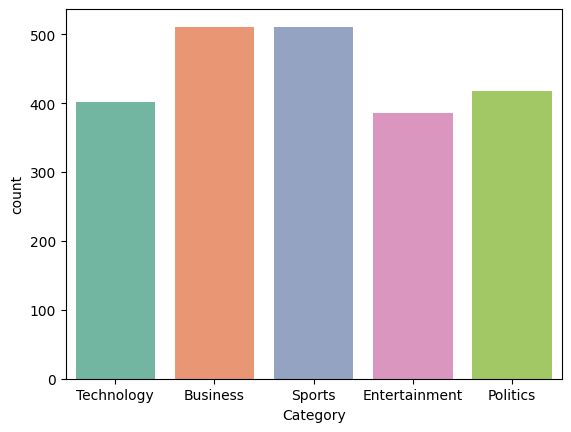

In [61]:
sns.countplot(data = df, x= 'Category',palette='Set2')
plt.show()

In [62]:
# Created a function to do the preprocessing of the text data:
def preprocess_text(text):
    # Remove non-letters
    text = re.sub(r'[^a-zA-Z]', ' ', text)

    # Convert to lowercase
    text = text.lower()

    # Tokenization
    words = word_tokenize(text)

    # Remove stopwords
    words = [word for word in words if word not in stopwords.words('english')]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]

    return ' '.join(words)

In [63]:
df['Processed_Article'] = df['Article'].apply(preprocess_text)

In [64]:
df.head()

,Category,Article,Processed_Article
0,Technology,tv future in the hands of viewers with home th...,tv future hand viewer home theatre system plas...
1,Business,worldcom boss left books alone former worldc...,worldcom bos left book alone former worldcom b...
2,Sports,tigers wary of farrell gamble leicester say ...,tiger wary farrell gamble leicester say rushed...
3,Sports,yeading face newcastle in fa cup premiership s...,yeading face newcastle fa cup premiership side...
4,Entertainment,ocean s twelve raids box office ocean s twelve...,ocean twelve raid box office ocean twelve crim...


In [65]:
# Encoding Target Variable

le = LabelEncoder()
df['Category_Encoded'] = le.fit_transform(df['Category'])

In [66]:
df.head()

,Category,Article,Processed_Article,Category_Encoded
0,Technology,tv future in the hands of viewers with home th...,tv future hand viewer home theatre system plas...,4
1,Business,worldcom boss left books alone former worldc...,worldcom bos left book alone former worldcom b...,0
2,Sports,tigers wary of farrell gamble leicester say ...,tiger wary farrell gamble leicester say rushed...,3
3,Sports,yeading face newcastle in fa cup premiership s...,yeading face newcastle fa cup premiership side...,3
4,Entertainment,ocean s twelve raids box office ocean s twelve...,ocean twelve raid box office ocean twelve crim...,1


In [67]:
# Feature Engineering
# To Convert the textual data into numerical values
# I have used both Bag of Words and TF-IDF

cv=CountVectorizer()
bow = cv.fit_transform(df['Processed_Article'])
# print("\nVocabulary:")

vocab_items = list(cv.vocabulary_.items())[:10]

for word, index in vocab_items:
    print(f"{word}: {index}")

# Display the BOW matrix and vocabulary
print("Bag of Words Matrix:",bow.toarray().shape)
print(bow.toarray())

tv: 22819
future: 8828
hand: 9762
viewer: 23650
home: 10331
theatre: 22114
system: 21720
plasma: 16588
high: 10179
definition: 5614
Bag of Words Matrix: (2225, 24728)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [68]:
bow.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [69]:
# TFIDF - Term Frequency/Inverse Document Frequency

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()
#print(tfidf.idf_)
TFIDF = tfidf.fit_transform(df['Processed_Article'])
print("\nVocabulary:")
vocab_items_tfidf = list(tfidf.vocabulary_.items())[:10]
for word, index in vocab_items_tfidf:
    print(f"{word}: {index}")
#print(tfidf.vocabulary_)

# Display the BOW matrix and vocabulary
print("TFIDF Matrix:",TFIDF.toarray().shape)
print(TFIDF.toarray())


Vocabulary:
tv: 22819
future: 8828
hand: 9762
viewer: 23650
home: 10331
theatre: 22114
system: 21720
plasma: 16588
high: 10179
definition: 5614
TFIDF Matrix: (2225, 24728)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [70]:
TFIDF.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [71]:
# train-test split
X=df['Processed_Article']
y=df['Category_Encoded']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1780,) (445,) (1780,) (445,)


In [72]:
# Confusion Matrix
def conf_matrix(y_test, y_pred):
  from sklearn.metrics import confusion_matrix
  import seaborn as sns
  conf_mat = confusion_matrix(y_test, y_pred)

  sns.heatmap(conf_mat, annot=True, xticklabels = df['Category'].unique(), yticklabels=df['Category'].unique(), cmap="Purples", fmt='g')



accuracy: 0.9595505617977528
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       101
           1       1.00      0.89      0.94        81
           2       0.92      0.98      0.95        83
           3       0.99      1.00      0.99        98
           4       0.95      0.98      0.96        82

    accuracy                           0.96       445
   macro avg       0.96      0.96      0.96       445
weighted avg       0.96      0.96      0.96       445



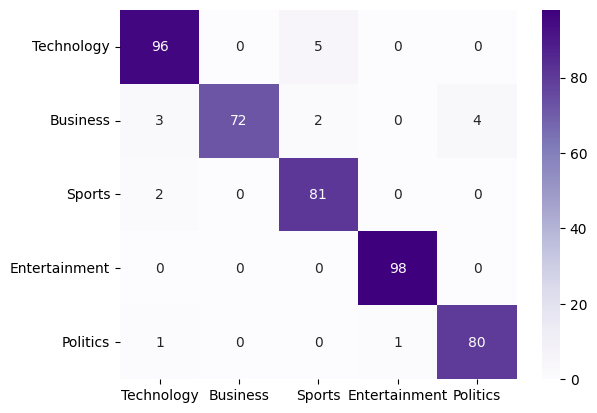

In [73]:
nb = Pipeline([('vect', CountVectorizer()), #Converts text data into a Bag of Words (BoW) representation
               ('tfidf', TfidfTransformer()), # Transforms BoW into TF-IDF format (which normalizes term frequency by inverse document frequency).
               ('clf', MultinomialNB()),# Naive Bayes classifier for text data.
              ])
nb.fit(X_train, y_train)

y_pred = nb.predict(X_test) # Predicts the categories for the test set articles.

print(f'accuracy: {accuracy_score(y_pred, y_test)}') # evaluates how well the model predicts the correct categories for the test set.

print(classification_report(y_test, y_pred)) # Provides precision, recall, and F1-score for each class (category).
conf_matrix(y_test, y_pred) # representation of the true vs predicted values

accuracy: 0.9685393258426966
Classification Report:

              precision    recall  f1-score   support

           0       0.96      0.92      0.94       101
           1       0.99      0.98      0.98        81
           2       0.93      0.98      0.95        83
           3       0.98      1.00      0.99        98
           4       0.99      0.98      0.98        82

    accuracy                           0.97       445
   macro avg       0.97      0.97      0.97       445
weighted avg       0.97      0.97      0.97       445

Confusion Matrix:



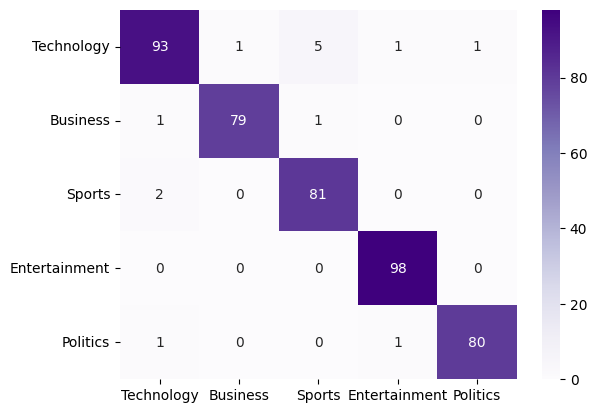

In [74]:
sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
sgd.fit(X_train, y_train)

y_pred = sgd.predict(X_test)

print(f'accuracy: {accuracy_score(y_pred, y_test)}')

print('Classification Report:\n')
print(classification_report(y_test, y_pred))

print('Confusion Matrix:\n')
conf_matrix(y_test, y_pred)

accuracy: {0.9662921348314607}
              precision    recall  f1-score   support

           0       0.96      0.93      0.94       101
           1       0.99      0.95      0.97        81
           2       0.93      0.98      0.95        83
           3       0.98      1.00      0.99        98
           4       0.98      0.98      0.98        82

    accuracy                           0.97       445
   macro avg       0.97      0.97      0.97       445
weighted avg       0.97      0.97      0.97       445



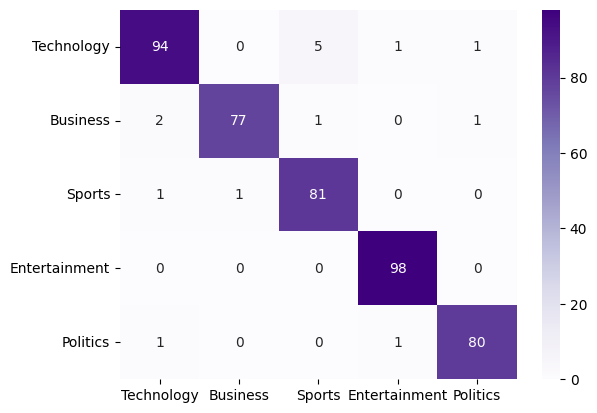

In [75]:
log_reg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs = 1, C = 1e5, max_iter=1000)),
               ])
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

print(f'accuracy:', {accuracy_score(y_pred, y_test)})
print(classification_report(y_test, y_pred))

conf_matrix(y_test, y_pred)

accuracy:0.8471910112359551
               precision    recall  f1-score   support

   Technology       0.81      0.82      0.82       105
     Business       0.85      0.80      0.82        75
       Sports       0.85      0.87      0.86        89
Entertainment       0.89      0.94      0.92        99
     Politics       0.84      0.79      0.81        77

    micro avg       0.85      0.85      0.85       445
    macro avg       0.85      0.84      0.84       445
 weighted avg       0.85      0.85      0.85       445
  samples avg       0.85      0.85      0.85       445



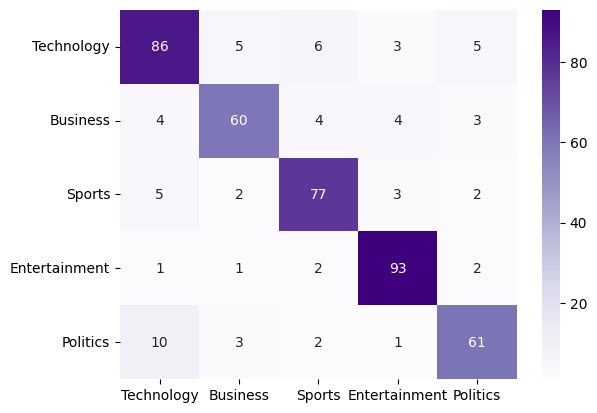

In [76]:
cv=CountVectorizer()

#Convert it to Numerical, as Decision Tree expects Numerical input
X = cv.fit_transform(df['Processed_Article']).toarray()
y = cv.fit_transform(df['Category']).toarray()
# split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

# Decision Tree Model:
model = DecisionTreeClassifier(criterion='gini')
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

print(f'accuracy:{accuracy_score(y_test,y_pred)}')

print(classification_report(y_test,y_pred,target_names=df['Category'].unique()))

conf_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))# As are taking it in array form

[Text(0.5769230769230769, 0.875, 'x[23411] <= 0.5\ngini = 0.319\nsamples = 1780\nvalue = [[1375, 405]\n[1469, 311]\n[1452, 328]\n[1368, 412]\n[1456, 324]]'),
 Text(0.3076923076923077, 0.625, 'x[12368] <= 0.5\ngini = 0.315\nsamples = 1623\nvalue = [[1224.0, 399.0]\n[1312.0, 311.0]\n[1296.0, 327.0]\n[1211.0, 412.0]\n[1449.0, 174.0]]'),
 Text(0.4423076923076923, 0.75, 'True  '),
 Text(0.15384615384615385, 0.375, 'x[2432] <= 0.5\ngini = 0.309\nsamples = 1432\nvalue = [[1051.0, 381.0]\n[1125.0, 307.0]\n[1272.0, 160.0]\n[1020.0, 412.0]\n[1260.0, 172.0]]'),
 Text(0.07692307692307693, 0.125, '\n  (...)  \n'),
 Text(0.23076923076923078, 0.125, '\n  (...)  \n'),
 Text(0.46153846153846156, 0.375, 'x[6864] <= 0.5\ngini = 0.09\nsamples = 191\nvalue = [[173, 18]\n[187, 4]\n[24, 167]\n[191, 0]\n[189, 2]]'),
 Text(0.38461538461538464, 0.125, '\n  (...)  \n'),
 Text(0.5384615384615384, 0.125, '\n  (...)  \n'),
 Text(0.8461538461538461, 0.625, 'x[11421] <= 0.5\ngini = 0.034\nsamples = 157\nvalue = [[151

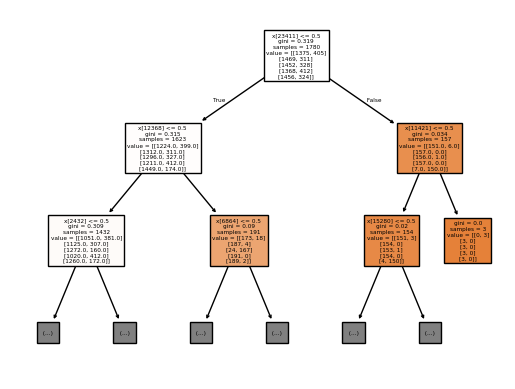

In [77]:
plot_tree(model,filled=True,max_depth=2)

accuracy:0.5932584269662922
               precision    recall  f1-score   support

   Technology       0.96      0.52      0.68        96
     Business       0.93      0.38      0.54        68
       Sports       0.97      0.61      0.75        99
Entertainment       0.46      1.00      0.63       101
     Politics       1.00      0.33      0.50        81

    micro avg       0.68      0.59      0.63       445
    macro avg       0.86      0.57      0.62       445
 weighted avg       0.85      0.59      0.63       445
  samples avg       0.59      0.59      0.59       445



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


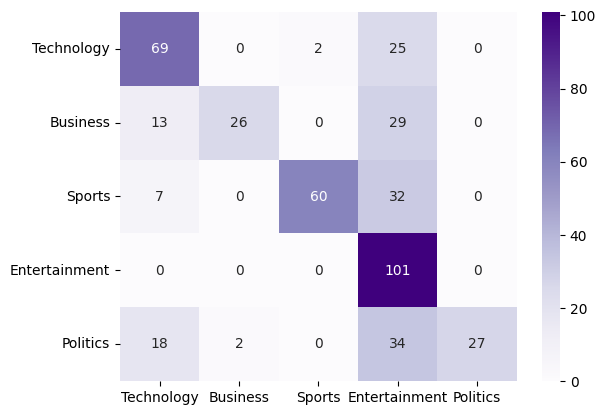

In [78]:
knn=KNeighborsClassifier(n_neighbors=5 , metric='euclidean')

X = cv.fit_transform(df['Processed_Article']).toarray()
y = cv.fit_transform(df['Category']).toarray()

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

print(f'accuracy:{accuracy_score(y_test,y_pred)}')

print(classification_report(y_test,y_pred,target_names=df['Category'].unique()))

conf_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))

accuracy:0.8561797752808988
               precision    recall  f1-score   support

   Technology       1.00      0.89      0.94       111
     Business       1.00      0.74      0.85        77
       Sports       1.00      0.77      0.87        79
Entertainment       1.00      0.99      1.00       106
     Politics       1.00      0.82      0.90        72

    micro avg       1.00      0.86      0.92       445
    macro avg       1.00      0.84      0.91       445
 weighted avg       1.00      0.86      0.92       445
  samples avg       0.86      0.86      0.86       445



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


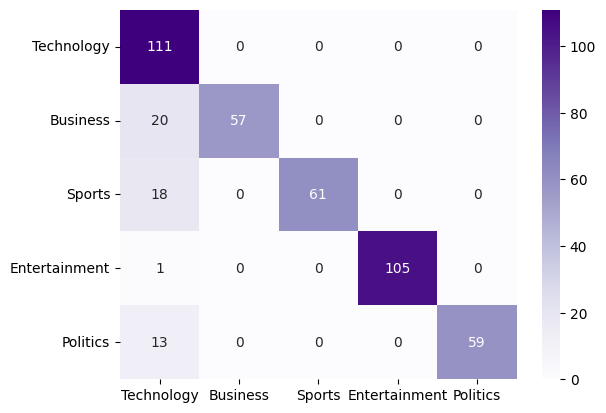

In [79]:
cv=CountVectorizer()

#Convert it to Numerical, as Decision Tree expects Numerical input
X = cv.fit_transform(df['Processed_Article']).toarray()
y = cv.fit_transform(df['Category']).toarray()

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

RFC = RandomForestClassifier(random_state=7,criterion='gini')
RFC.fit(X_train,y_train)
y_pred = RFC.predict(X_test)


print(f'accuracy:{accuracy_score(y_test,y_pred)}')

print(classification_report(y_test,y_pred,target_names = df['Category'].unique()))

conf_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))